In [2]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

Text(0, 0.5, 'Y axis')

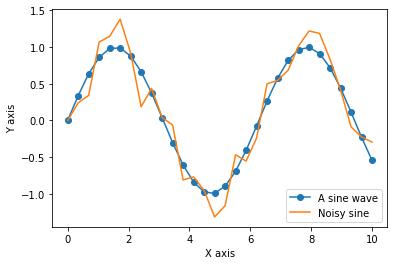

In [3]:
##Hello Matplotlib = mpl
x = np.linspace(0, 10, 30)  #array of 30 points from 0 to 10
y = np.sin(x)
z = y + np.random.normal(size=30) * .2
plt.plot(x, y, 'o-', label='A sine wave')
plt.plot(x, z, '-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [8]:
##Hello Numpy = np
print ("Make a 3 row x 4 column array of random numbers")
x = np.random.random((3, 4))
print (x)
print

print ("Add 1 to every element")
x = x + 1
print (x)
print

print ("Get the element at row 1, column 2") ##Algo no está funcionando bien, revisar
print (x[1, 2])
print

# The colon syntax is called "slicing" the array. 
print ("Get the first row")
print (x[0, :])
print

print ("Get every 2nd column of the first row") #Esta esta tomando la primera y la tercera columna
print (x[0, ::2])
print

Make a 3 row x 4 column array of random numbers
[[0.02451619 0.30020481 0.76347964 0.24561766]
 [0.75200538 0.60481385 0.36075938 0.04079572]
 [0.21180837 0.48420567 0.01796191 0.70833653]]
Add 1 to every element
[[1.02451619 1.30020481 1.76347964 1.24561766]
 [1.75200538 1.60481385 1.36075938 1.04079572]
 [1.21180837 1.48420567 1.01796191 1.70833653]]
Get the element at row 1, column 2
1.3607593798492545
Get the first row
[1.02451619 1.30020481 1.76347964 1.24561766]
Get every 2nd column of the first row
[1.02451619 1.76347964]


<function print>

In [11]:
print ("Max is  ", x.max())
print ("Min is  ", x.min())
print ("Mean is ", x.mean())

Max is   1.7634796412860858
Min is   1.017961906449937
Mean is  1.3762087591644196


In [12]:
print (x.max(axis=1))

[1.76347964 1.75200538 1.70833653]


In [13]:
x = np.random.binomial(500, .5)
print ("number of heads:", x)

number of heads: 236


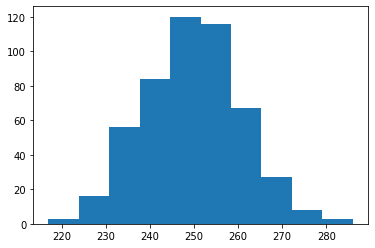

In [14]:
# 3 ways to run the simulations

# loop
heads = []
for i in range(500):
    heads.append(np.random.binomial(500, .5))

# "list comprehension"
heads = [np.random.binomial(500, .5) for i in range(500)]

# pure numpy
heads = np.random.binomial(500, .5, size=500)

histogram = plt.hist(heads, bins=10)

In [15]:
heads.shape

(500,)